In [24]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

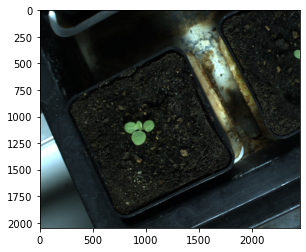

In [32]:
img = cv2.imread("tobacco_plant002_rgb.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)



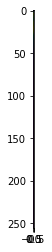

In [30]:
Hist =cv2.calcHist([img], [0], None, [256], [0,256])
plt.imshow(Hist)

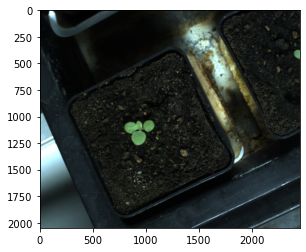

In [14]:
median_img41_rgb = cv2.medianBlur(img_rgb, 5)
plt.imshow(median_img41_rgb)

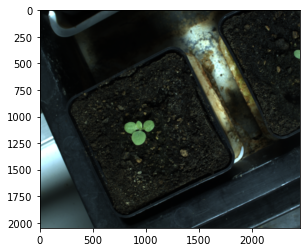

In [18]:
kernel =np.ones((5,5),np.uint8)
erosion =cv2.erode(img_rgb,kernel,iterations =1)
opening = cv2.morphologyEx(median_img41_rgb, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

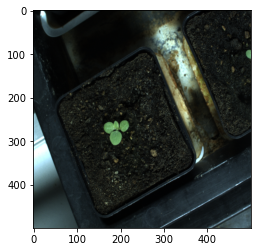

In [9]:
img_res = cv2.resize(img_rgb, (500, 500), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_res)

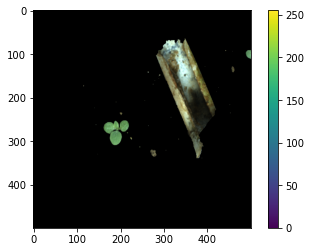

(<matplotlib.image.AxesImage at 0x7f8812280d90>,
 None)

In [22]:
mask = np.zeros(img_res.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img_res,mask,rect,bgdModel,fgdModel, 5, cv2.GC_INIT_WITH_RECT )

mask2 = np.where((mask==2)|(mask==0), 0,1).astype('uint8')
img = img_res*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()